# Assignment 7B

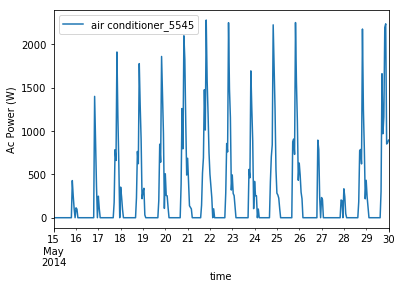

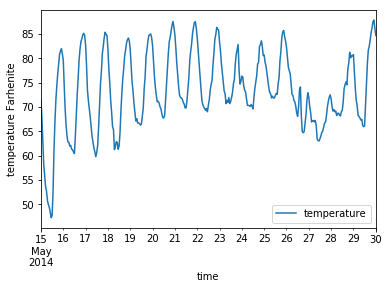

C:\Users\LoruPortatile\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\LoruPortatile\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\LoruPortatile\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

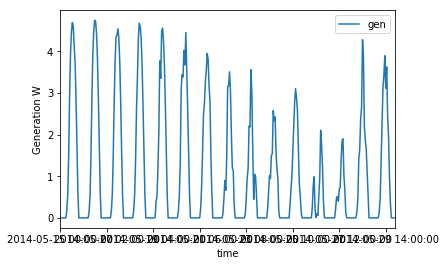

C:\Users\LoruPortatile\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\LoruPortatile\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\LoruPortatile\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

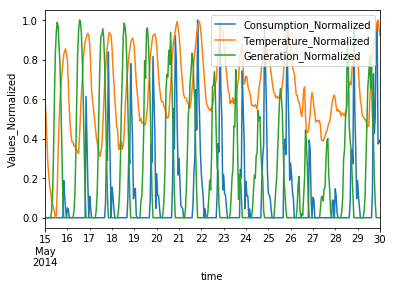

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

ExternalFileFolder=r"C:\Users\LoruPortatile\Desktop\clima 2\python4ScientificComputing_Numpy_Pandas_MATPLotLIB\ExternalFiles"
ConsumptionFileName="consumption_5545.csv"
TemperatureFileName="Austin_weather_2014.csv"
IrradiationFileName="irradiance_2014_gen.csv"

path_consumptionFile=os.path.join(ExternalFileFolder,ConsumptionFileName)
path_TemperatureFile=os.path.join(ExternalFileFolder,TemperatureFileName)
path_IrradiationFile=os.path.join(ExternalFileFolder,IrradiationFileName)



#Consumption plot

DF_consumption=pd.read_csv(path_consumptionFile, sep=",", index_col=0)
Previous_index=DF_consumption.index
NewParsedIndex=pd.to_datetime(Previous_index)
DF_consumption.index=NewParsedIndex
DF_consumption_may=DF_consumption["2014-05-15 00:00:00":"2014-05-30 00:00:00"]
plt.figure()
DF_consumption_may.plot()
plt.xlabel("time")
plt.ylabel("Ac Power (W)")
plt.show()



#Temperature plot

DF_weather=pd.read_csv(path_TemperatureFile, sep=";", index_col=0)
DF_weather.head(24)
PreviousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(PreviousIndex_weather)
DF_weather.index=newIndex_weather
Series_Temperature=DF_weather["temperature"]
DF_Temperature=DF_weather[["temperature"]]
DF_Temperature_may=DF_Temperature["2014-05-15 00:00:00":"2014-05-30 00:00:00"]

plt.figure()
DF_Temperature_may.plot()
plt.xlabel("time")
plt.ylabel("temperature Farhenite")
plt.show()


#Irradiation plot

DF_irradianceSource=pd.read_csv(path_IrradiationFile, sep=";", index_col=1)
DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0]=0

DF_irradiance_may=DF_irradiance["2014-05-15 00:00:00":"2014-05-30 00:00:00"]
plt.figure()
DF_irradiance_may.plot()
plt.xlabel("time")
plt.ylabel("Generation W")
plt.show()


#Temperature normalization

temp_min=DF_Temperature_may["temperature"].min()
temp_max=DF_Temperature_may["temperature"].max()
DF_Temperature_may["temperature"]=(DF_Temperature_may["temperature"]-temp_min)/(temp_max-temp_min)
DF_Temperature_may.columns=pd.Series("Temperature_Normalized")



#Consumption normalization

cons_min=DF_consumption_may["air conditioner_5545"].min()
cons_max=DF_consumption_may["air conditioner_5545"].max()
DF_consumption_may["air conditioner_5545"]=(DF_consumption_may["air conditioner_5545"]-cons_min)/(cons_max-cons_min)
DF_consumption_may.columns=pd.Series("Consumption_Normalized")



#Irradiance normalization

gen_min=DF_irradiance_may["gen"].min()
gen_max=DF_irradiance_may["gen"].max()
DF_irradiance_may["gen"]=(DF_irradiance_may["gen"]-gen_min)/(gen_max-gen_min)
DF_irradiance_may.columns=pd.Series("Generation_Normalized")
DF_joined_may=DF_consumption_may.join([DF_Temperature_may,DF_irradiance_may])
DF_joined_may.head(24)



#Plotting

plt.figure()
DF_joined_may.plot()
plt.xlabel("time")
plt.ylabel("Values_Normalized")
plt.show()
  